# Lista 01 - Prof. Dr. Leandro Ferreira


1 - O arquivo claims.csv contém uma amostra aleatória de 996 apólices de seguros de veículos referente ao período 2004-2005. As variáveis do arquivo estão na seguinte ordem : (i) valorv (valor do veículo em 10000 dolares australianos), (ii) expos (exposição do veículo), (iii) nsinistros (número de sinistros no período), (iv) csinistros (custo total dos sinistros em dolares australianos), (v) tipov (tipo do veículo em 11 categorias), (vi) idadev (idade do veículo em 4 categorias), (vii) sexoc (sexo do condutor principal), (viii) areac (área de residência do condutor principal) e (ix) idadec (idade do condutor principal em 6 categorias).

Faça uma análise descritiva dos dados e procure agrupar em um número menor de categorias algumas variáveis categóricas. Considere como variável resposta (target) cmsinistros = csinistros/nsinistros.

a) Qual é a relação da variável cmsinistros com sexo? Algum sexo é maior em média? Você consegue defender seu argumento utilizando as tecnicas que estudou?

b) Estude cmsinistros em relação a idade do condutor. Sua impressão muda se adicionarmos a variável sexo?

c) Existe uma relação clara de aumento de risco cmsinistros em relação ao valor do veículo?

d) Faça uma amostra -Aleatória simples (200) -Estratificada (100 do sexo Masculino e 100 do sexo feminino)

In [14]:
import pandas as pd

url = 'https://raw.githubusercontent.com/julio-monzem/estatistica-aplicada/refs/heads/main/claims.csv'

dados = pd.read_csv(url, delimiter=';', decimal=',')

dados['cmsinistros'] = dados.csinistros / dados.nsinistros


,cmsinistros
sexoc,
F,630.48
M,703.02


<Axes: xlabel='sexoc'>

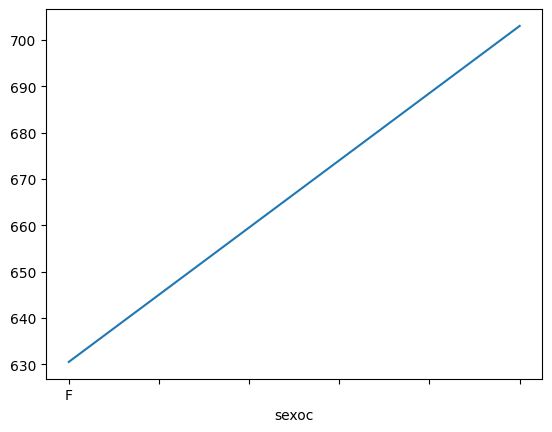

In [16]:
# a

dados.groupby('sexoc')['cmsinistros'].median()

In [17]:
dados.groupby('idadec')['cmsinistros'].median()

,cmsinistros
idadec,
1,712.454996
2,644.549999
3,621.969999
4,723.129999
5,558.900000
6,703.020000


In [18]:
dados.groupby(['idadec', 'sexoc'])['cmsinistros'].median()

idadec  sexoc
1       F        613.049999
        M        734.939999
2       F        634.725000
        M        644.549999
3       F        633.489999
        M        484.165000
4       F        585.250000
        M        886.000000
5       F        481.855000
        M        603.330000
6       F        696.209999
        M        733.894999
Name: cmsinistros, dtype: float64

2 - Para esse exercício será utilizado os dados referentes a um estudo de caso-controle realizado no Setor de Anatomia e Patologia do Hospital Heliópolis em São Paulo, no período de 1970 a 1982 (canc3.csv). Um total de 175 pacientes com processo infecioso pulmonar atendido no hospital no período acima foi classificado segundo as seguintes variáveis: tipo, tipo de tumor (1: maligno, 0: benigno); IDADE, idade em anos; SEXO (0:masculino, 1: feminino); HL, intensidade da célula histócitos-linfócitos (1:ausente, 2: discreta, 3: moderada, 4: intensa) e FF, intensidade da célula fibrose-frouxa (1:ausente, 2: discreta, 3: moderada, 4: intensa).

a) Faça uma análise descritiva das variáveis do problema.

b) Existe alguma variável que chama atenção em relação ao tipo de tumor? (Dica: Cruze as variáveis em relação ao tipo de tumor).

3 - Cada amostra de ar tem 10% de chance de conter uma certa molécula rara. Considere que as amostras sejam independentes com relação à presença da molécula rara. Encontre a probabilidade de que em 18 amostras:

a) Exatamente 2 contenham a molécula rara.

b) No mínimo 4 amostras contenham a molécula rara.

c) De 3 a 7 amostras contenham a molécula rara.

d) O número médio e a variância de moléculas raras.

In [ ]:
from scipy.stats import binom

probabilidade = 0.10
n = 18

a = binom.pmf(2, n, probabilidade)
print(a)

b = 1 - binom.cdf(3, n, probabilidade)
print(b)

c = binom.cdf(7, n, probabilidade) - binom.cdf(2, n, probabilidade)
print(c)

q = 1 - probabilidade
nro_medio = n * probabilidade
variancia = n * probabilidade * q

d = (nro_medio, variancia)
print(d)

0.2835120888943317
0.0981968414254375
0.26603054787476754
(1.8, 1.62)
